In [226]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [227]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [228]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [230]:
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"Null values in {column}: {null_count}")

Null values in id: 0
Null values in gender: 0
Null values in age: 0
Null values in hypertension: 0
Null values in heart_disease: 0
Null values in ever_married: 0
Null values in work_type: 0
Null values in Residence_type: 0
Null values in avg_glucose_level: 0
Null values in bmi: 201
Null values in smoking_status: 0
Null values in stroke: 0


In [231]:
for column in df.columns:
  print(column)
  print(df[column].unique())
  print(df[column].dtype,"\n")

id
[ 9046 51676 31112 ... 19723 37544 44679]
int64 

gender
['Male' 'Female' 'Other']
object 

age
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-

In [232]:
other_gender_count = (df['gender'] == 'Other').sum()

print("Number of rows with gender 'Other':", other_gender_count)
other_smoker_count = (df['smoking_status'] == 'Unknown').sum()

print("Number of rows with smoking status 'Unknown':", other_smoker_count)


Number of rows with gender 'Other': 1
Number of rows with smoking status 'Unknown': 1544


In [233]:
df = df[df['gender'] != 'Other']

imputer = KNNImputer(n_neighbors=5)
df['bmi'] = imputer.fit_transform(df[['bmi']])
mode_smoking_status = df['smoking_status'].mode()[0]
df['smoking_status'].replace('Unknown', mode_smoking_status, inplace=True)

df.dropna(inplace=True)

df.sample(n = 10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5021,15517,Female,35.0,0,0,Yes,Private,Urban,81.90,24.50000,never smoked,0
1568,354,Female,65.0,0,0,Yes,Private,Urban,72.49,28.90000,smokes,0
778,10572,Female,63.0,0,0,Yes,Private,Rural,92.70,29.50000,never smoked,0
825,33400,Male,59.0,0,0,Yes,Govt_job,Rural,73.75,27.30000,smokes,0
1170,20162,Female,80.0,0,0,Yes,Private,Rural,75.62,25.10000,smokes,0
1060,6965,Female,19.0,0,0,No,Private,Rural,96.02,21.90000,never smoked,0
3053,10436,Female,29.0,0,0,Yes,Private,Rural,102.07,31.80000,never smoked,0
4331,49605,Male,63.0,0,0,Yes,Private,Urban,74.39,31.00000,formerly smoked,0
671,967,Male,61.0,0,1,Yes,Private,Urban,88.27,28.89456,never smoked,0
4580,18930,Female,51.0,0,0,Yes,Govt_job,Urban,95.33,27.90000,never smoked,0


In [234]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print(df[i].dtype,"\n")

id
[ 9046 51676 31112 ... 19723 37544 44679]
int64 

gender
['Male' 'Female']
object 

age
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e

In [235]:
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"Null values in {column}: {null_count}")


Null values in id: 0
Null values in gender: 0
Null values in age: 0
Null values in hypertension: 0
Null values in heart_disease: 0
Null values in ever_married: 0
Null values in work_type: 0
Null values in Residence_type: 0
Null values in avg_glucose_level: 0
Null values in bmi: 0
Null values in smoking_status: 0
Null values in stroke: 0


In [236]:
print(f"ٌRecords Duplicates: {df.duplicated().sum()}")

ٌRecords Duplicates: 0


In [237]:
label_encoder = LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

# Display the first few rows of the dataframe after encoding
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.60000,0,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.89456,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.50000,1,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.40000,2,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.00000,1,1


In [238]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

In [239]:
df = df.drop(['id'], axis = 1)
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60000,0,1
1,0,61.0,0,0,1,3,0,202.21,28.89456,1,1
2,1,80.0,0,1,1,2,0,105.92,32.50000,1,1
3,0,49.0,0,0,1,2,1,171.23,34.40000,2,1
4,0,79.0,1,0,1,3,0,174.12,24.00000,1,1


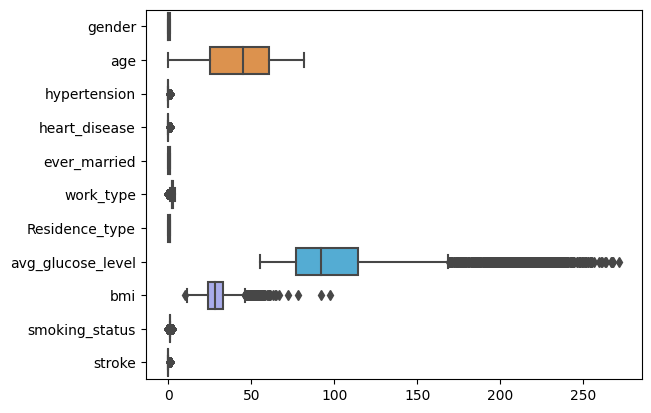

In [240]:
sns.boxplot(data=df, orient='h')
plt.show()

In [241]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))
df[numerical_cols] = np.where(outliers, df[numerical_cols].median(), df[numerical_cols])

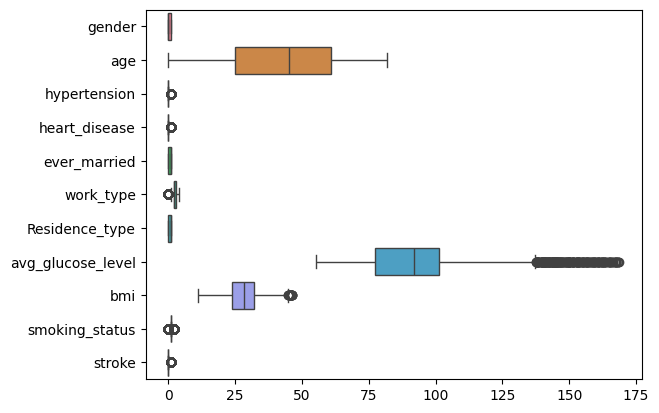

In [242]:
sns.boxplot(data=df, orient='h')
plt.show()

In [243]:
df['Has_Diabetes'] = (df['avg_glucose_level'] > 126).astype(int)

df['Is_Obese'] = (df['bmi'] > 30).astype(int)

df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Has_Diabetes,Is_Obese
0,1,67.0,0,1,1,2,1,91.88,36.60000,0,1,0,1
1,0,61.0,0,0,1,3,0,91.88,28.89456,1,1,0,0
2,1,80.0,0,1,1,2,0,105.92,32.50000,1,1,0,1
3,0,49.0,0,0,1,2,1,91.88,34.40000,2,1,0,1
4,0,79.0,1,0,1,3,0,91.88,24.00000,1,1,0,0
5,1,81.0,0,0,1,2,1,91.88,29.00000,0,1,0,0
6,1,74.0,1,1,1,2,0,70.09,27.40000,1,1,0,0
7,0,69.0,0,0,0,2,1,94.39,22.80000,1,1,0,0
8,0,59.0,0,0,1,2,0,76.15,28.89456,1,1,0,0
9,0,78.0,0,0,1,2,1,58.57,24.20000,1,1,0,0


In [244]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']

In [245]:
stroke_negative = (df['stroke'] == 0).sum()

print("Number of rows without stroke:", stroke_negative)

stroke_positive = (df['stroke'] == 1).sum()

print("Number of rows with stroke:", stroke_positive)

Number of rows without stroke: 4860
Number of rows with stroke: 249


In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [247]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols]) 
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [248]:
best_params = None

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}
 
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_weighted', cv=10, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


Confusion Matrix:
 [[1442    2]
 [  88    1]]
Accuracy: 0.9413
Precision: 0.3333
Recall: 0.0112
F1 Score: 0.0217
Classification Report:
                      precision    recall  f1-score   support

 Low Risk of Stroke       0.94      1.00      0.97      1444
High Risk of Stroke       0.33      0.01      0.02        89

           accuracy                           0.94      1533
          macro avg       0.64      0.50      0.50      1533
       weighted avg       0.91      0.94      0.91      1533



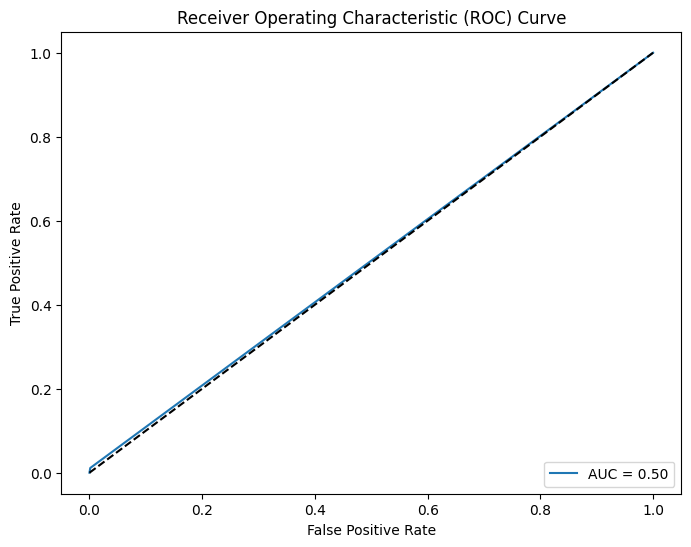

AUC: 0.5049


In [249]:
final_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], criterion=best_params['criterion'], class_weight=best_params['class_weight'], random_state=42)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

class_names = ['Low Risk of Stroke', 'High Risk of Stroke']

class_report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.4f}")


In [250]:
print("X train: ", X_train.shape)
print("Y train: ", y_train.shape)
print("X test: ", X_test.shape)
print("Y test: ", y_test.shape)

X train:  (3576, 12)
Y train:  (3576,)
X test:  (1533, 12)
Y test:  (1533,)


In [251]:
stroke_negative = (y_train == 0).sum()

print("Number of rows without stroke:", stroke_negative)

stroke_positive = (y_train == 1).sum()

print("Number of rows with stroke:", stroke_positive)

Number of rows without stroke: 3416
Number of rows with stroke: 160


In [252]:
rus  = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [253]:
print("X train: ", X_train_rus.shape)
print("Y train: ", y_train_rus.shape)
print("X test: ", X_test.shape)
print("Y test: ", y_test.shape)

X train:  (320, 12)
Y train:  (320,)
X test:  (1533, 12)
Y test:  (1533,)


In [254]:
stroke_negative = (y_train_rus == 0).sum()

print("Number of rows without stroke:", stroke_negative)

stroke_positive = (y_train_rus == 1).sum()

print("Number of rows with stroke:", stroke_positive)

Number of rows without stroke: 160
Number of rows with stroke: 160


In [255]:
best_params = None

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}
 
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_weighted', cv=10, n_jobs=-1)

grid_search.fit(X_train_rus, y_train_rus)

best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

final_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], criterion=best_params['criterion'], class_weight=best_params['class_weight'], random_state=42)
final_model.fit(X_train_rus, y_train_rus)

Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=50, random_state=42)

Confusion Matrix:
 [[1021  423]
 [  18   71]]
Classification Report:
                      precision    recall  f1-score   support

 Low Risk of Stroke       0.98      0.71      0.82      1444
High Risk of Stroke       0.14      0.80      0.24        89

           accuracy                           0.71      1533
          macro avg       0.56      0.75      0.53      1533
       weighted avg       0.93      0.71      0.79      1533



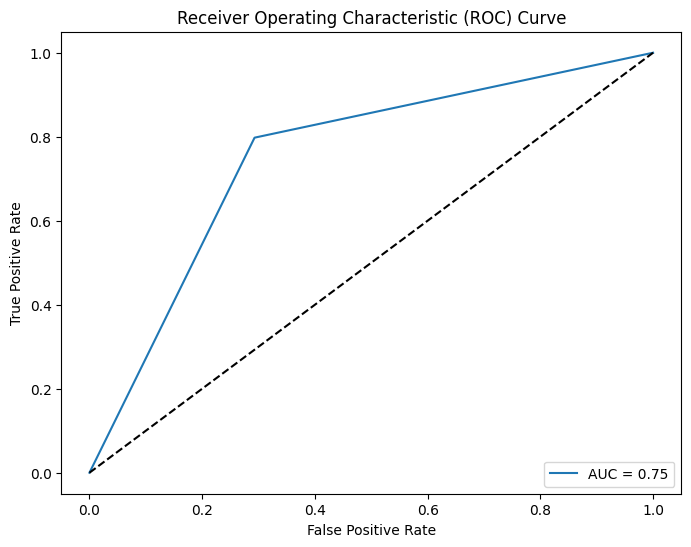

AUC: 0.7524


In [256]:
y_pred = final_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_names = ['Low Risk of Stroke', 'High Risk of Stroke']

class_report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.4f}")


In [257]:
smt  = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

In [258]:
print("X train: ", X_train_smt.shape)
print("Y train: ", y_train_smt.shape)
print("X test: ", X_test.shape)
print("Y test: ", y_test.shape)

X train:  (6832, 12)
Y train:  (6832,)
X test:  (1533, 12)
Y test:  (1533,)


In [259]:
stroke_negative = (y_train_smt == 0).sum()

print("Number of rows without stroke:", stroke_negative)

stroke_positive = (y_train_smt == 1).sum()

print("Number of rows with stroke:", stroke_positive)

Number of rows without stroke: 3416
Number of rows with stroke: 3416


In [260]:
best_params = None

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}
 
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_weighted', cv=10, n_jobs=-1)

grid_search.fit(X_train_smt, y_train_smt)

best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

final_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], criterion=best_params['criterion'], class_weight=best_params['class_weight'], random_state=42)
final_model.fit(X_train_smt, y_train_smt)

Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=50, random_state=42)

Confusion Matrix:
 [[1321  123]
 [  66   23]]
Classification Report:
                      precision    recall  f1-score   support

 Low Risk of Stroke       0.95      0.91      0.93      1444
High Risk of Stroke       0.16      0.26      0.20        89

           accuracy                           0.88      1533
          macro avg       0.55      0.59      0.56      1533
       weighted avg       0.91      0.88      0.89      1533



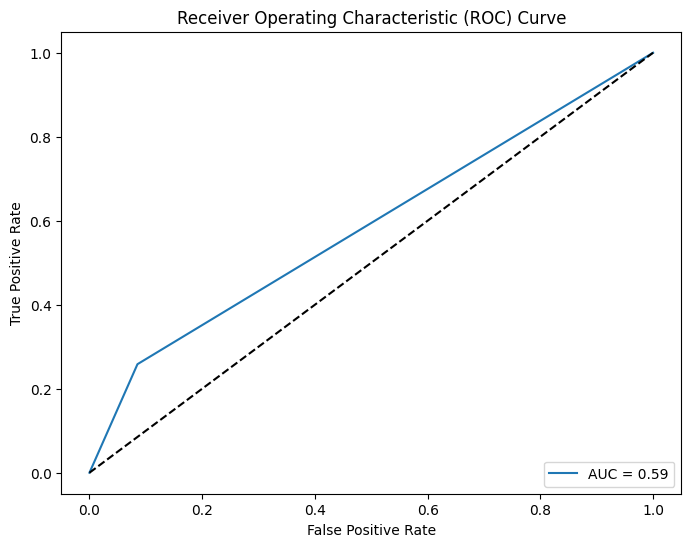

AUC: 0.5866


In [261]:
y_pred = final_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_names = ['Low Risk of Stroke', 'High Risk of Stroke']

class_report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.4f}")


In [262]:
adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [263]:
print("X train: ", X_train_adasyn.shape)
print("Y train: ", y_train_adasyn.shape)
print("X test: ", X_test.shape)
print("Y test: ", y_test.shape)

X train:  (6883, 12)
Y train:  (6883,)
X test:  (1533, 12)
Y test:  (1533,)


In [264]:
stroke_negative = (y_train_adasyn == 0).sum()

print("Number of rows without stroke:", stroke_negative)

stroke_positive = (y_train_adasyn == 1).sum()

print("Number of rows with stroke:", stroke_positive)

Number of rows without stroke: 3416
Number of rows with stroke: 3467


In [265]:
best_params = None

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}
 
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_weighted', cv=10, n_jobs=-1)

grid_search.fit(X_train_adasyn, y_train_adasyn)

best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

final_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], criterion=best_params['criterion'], class_weight=best_params['class_weight'], random_state=42)
final_model.fit(X_train_adasyn, y_train_adasyn)

Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=50, random_state=42)

Confusion Matrix:
 [[1310  134]
 [  67   22]]
Classification Report:
                      precision    recall  f1-score   support

 Low Risk of Stroke       0.95      0.91      0.93      1444
High Risk of Stroke       0.14      0.25      0.18        89

           accuracy                           0.87      1533
          macro avg       0.55      0.58      0.55      1533
       weighted avg       0.90      0.87      0.89      1533



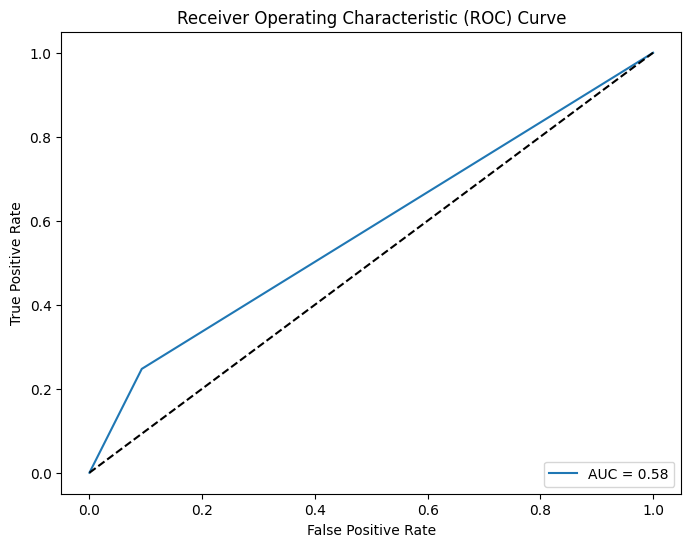

AUC: 0.5772


In [266]:
y_pred = final_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_names = ['Low Risk of Stroke', 'High Risk of Stroke']

class_report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.4f}")


In [48]:

# data_to_predict = {
#     'gender': 'Male',
#     'age': 55,
#     'hypertension': 1,
#     'heart_disease': 0,
#     'ever_married': 'Yes',
#     'work_type': 'Private',
#     'Residence_type': 'Urban',
#     'avg_glucose_level': 85.5,
#     'bmi': 28.0,
#     'smoking_status': 'Unknown'
# }

# data_to_predict_df = pd.DataFrame([data_to_predict])
# gender_mapping = {'Male': 1, 'Female': 0}
# ever_married_mapping = {'Yes': 1, 'No': 0}
# work_type_mapping = {'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4}
# residence_type_mapping = {'Urban': 1, 'Rural': 0}
# smoking_status_mapping = {'formerly smoked': 0, 'never smoked': 1, 'smokes': 2}

# data_to_predict_df['smoking_status'].replace('Unknown', mode_smoking_status, inplace=True)
# data_to_predict_df.dropna(inplace=True)

# data_to_predict_df['gender'] = data_to_predict_df['gender'].map(gender_mapping)
# data_to_predict_df['ever_married'] = data_to_predict_df['ever_married'].map(ever_married_mapping)
# data_to_predict_df['work_type'] = data_to_predict_df['work_type'].map(work_type_mapping)
# data_to_predict_df['Residence_type'] = data_to_predict_df['Residence_type'].map(residence_type_mapping)
# data_to_predict_df['smoking_status'] = data_to_predict_df['smoking_status'].map(smoking_status_mapping)

# prediction = final_model.predict(data_to_predict_df)

# print("Prediction:", prediction[0])
